In [1]:
#SIH OCR Model
!pip install keras-ocr

In [2]:
import keras_ocr
import numpy as np
from matplotlib import pyplot as plt

In [3]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\yashs\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\yashs\.keras-ocr\crnn_kurapan.h5


In [4]:
image = [keras_ocr.tools.read(images) for images in [r"C:\Users\yashs\Desktop\imgae_data'\real11.jpeg", r"C:\Users\yashs\Desktop\imgae_data'\real11.jpeg"]]

In [5]:
print(np.shape(image))

(2, 867, 1156, 3)


In [6]:
prediction = pipeline.recognize(image)

In [7]:
a = []
predicted_image_1 = prediction[0]
for text, box in predicted_image_1:
    print(text)
    a.append(text)

22xc
6xb
45xa
1xb
1oxd


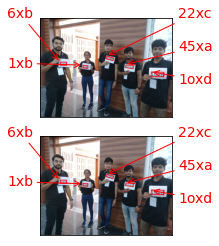

In [8]:
n = len(image)
from IPython.core.pylabtools import figsize
fig, axs = plt.subplots(nrows = n)
for ax, image, predictions in zip(axs, image, prediction):
  keras_ocr.tools.drawAnnotations(image = image, predictions = predictions, ax =ax)

In [9]:
all = []
all.append(prediction)
import pandas as pd
print(a)

['22xc', '6xb', '45xa', '1xb', '1oxd']


In [10]:

        b = []
        c = []
        j = 0
        x = 1
        for text, box in predicted_image_1:
            if ('x' in text):
                character = ""
                number = ""
                for i in text:
                    if (i == 'x'):
                        j = 1
                        continue
                    if (j == 0):
                        if (i.isdigit() or i == 'b' or i == 'o' or i == 'i' or i == 'z' or i == 's' or i == 'a'):
                            if (i == 'b'):
                                i = '6'
                            if (i == 'o'):
                                i = '0'
                            if (i == 'i'):
                                i = '1'
                            if (i == 'z'):
                                i = '3'
                            if (i == 's'):
                                i = '5'
                            if (i == 'a'):
                                i = '4'
                        number += i
                    elif (j == 1):
                        character += i
                    if (i == text[-1]):
                        b.append(number)
                        c.append(character)
                        j = 0
        df = pd.DataFrame(list(zip(b, c)), columns=["RollNo.", "Answer"])
        #df = pd.insert(0, 'Stud_ID', range(1, 1 + len(df)))
        print(df)
        #df.to_csv("temp1.csv", index=False)

  RollNo. Answer
0      22      c
1       6      b
2      45      a
3       1      b
4      10      d


In [11]:
#CSV File Comparision
f2 = pd.read_csv(r"C:\Users\yashs\Desktop\sih_project\eacher_ans.csv")

kp=pd.DataFrame(f2)
fd = pd.DataFrame()
fd.to_csv('empty_csv.csv')


c = []
for i in df['Answer']:
    if (i == kp['correct_ans'][0]):
        
        c.append("1")
    else: 

        c.append("0")


fd["result"] = c
fd["ques_no"] = 1

#print(fd)


fd.to_csv('empty_csv.csv')
f3 = pd.read_csv(r'empty_csv.csv')
lp=pd.DataFrame(f3)
lp = lp.rename(columns = {'Unnamed: 0':'Student_ID'})
print(lp)



   Student_ID  result  ques_no
0           0       0        1
1           1       1        1
2           2       0        1
3           3       1        1
4           4       0        1
